In [1]:
from STMiner.Simulate.Simulate import Simulator 
from STMiner.SPFinder import SPFinder

sp = SPFinder()
sp.read_h5ad(file='I://zebrafish/10X_Visium_hunter2021spatially_sample_C_data.h5ad')

E:\conda\envs\dev\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
E:\conda\envs\dev\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
E:\conda\envs\dev\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not s

In [2]:
from STMiner.Algorithm.distance import get_exp_array

arr_li = []
for i in ['nppb', 'pmela', 'epd', 'trpv6', 'sln', 'pvalb2', 'krt15']:
    arr_li.append(get_exp_array(sp.adata, i))

sim = Simulator(arr_li)

In [3]:
sim.set_noise_type(noise_type='gauss', noise_argument=0.2)
a = sim.generate(offset_radius=5, count=100, add_noise=True, offset_probability=0.8)

In [4]:
sp.set_adata(a)

In [5]:
sp.fit_pattern(n_top_genes=-1, n_comp=20,min_cells=0)
sp.build_distance_array()

Building distance array...: 100%|██████████| 700/700 [09:38<00:00,  1.21it/s]


In [10]:
sp.build_distance_array(method='mse')

Building distance array...: 100%|██████████| 700/700 [00:20<00:00, 33.66it/s]


In [11]:
sp.cluster_gene(n_clusters=7, mds_components=20)

In [12]:
sp.genes_labels

,gene_id,labels
0,gene_P0_N0,0
1,gene_P0_N1,0
2,gene_P0_N2,0
3,gene_P0_N3,0
4,gene_P0_N4,0
...,...,...
695,gene_P6_N95,5
696,gene_P6_N96,5
697,gene_P6_N97,0
698,gene_P6_N98,5


In [15]:
sp.kmeans_fit_result.cluster_centers_

array([[ 2.02425112e-02,  2.77678605e-01,  2.24817178e-01,
        -1.98902212e-01,  4.60531212e-01,  2.76649840e-01,
         4.59045327e-01, -6.88589781e-01, -1.84698133e-01,
         3.61048560e-04,  2.21537589e-01,  5.03233390e-02,
         2.86419463e-01,  3.83254360e-01, -1.53099812e-03,
        -5.15541637e-01, -1.15631913e-01, -2.06330111e-01,
         2.30298563e-01, -2.45220112e-01],
       [-5.18412494e+00, -1.04436694e+01, -1.24077114e-01,
         9.68030448e-01, -4.27337981e+00, -2.28155982e+00,
         9.86400694e-01,  8.58426451e+00,  5.51292994e+00,
        -4.56242236e+00, -4.39588557e+00,  2.89470432e+00,
        -4.20392306e+00,  4.51630803e+00,  6.45725939e+00,
         3.68373680e+00,  1.93084056e+00,  4.45210160e+00,
        -3.27520084e+00, -8.21591916e+00],
       [ 1.83660376e+01,  1.14270191e+01,  1.14870644e+01,
        -2.00172032e+01,  8.60163080e+00,  1.20299729e+01,
        -2.18166594e+01,  1.59734375e+01, -1.75742449e+01,
        -1.93210784e+01, -3.5

In [23]:
import numpy as np


np.linalg.norm(sp.kmeans_fit_result.cluster_centers_[0]-sp.kmeans_fit_result.cluster_centers_[4])

16.774665278763525

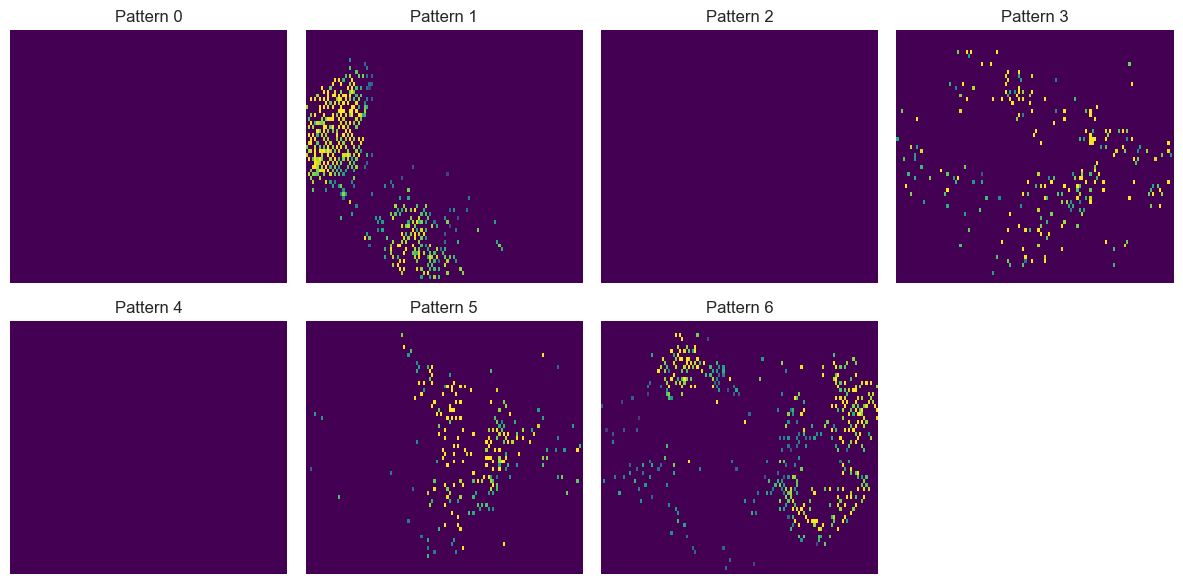

In [23]:
sp.plot.plot_pattern(vmax=99)

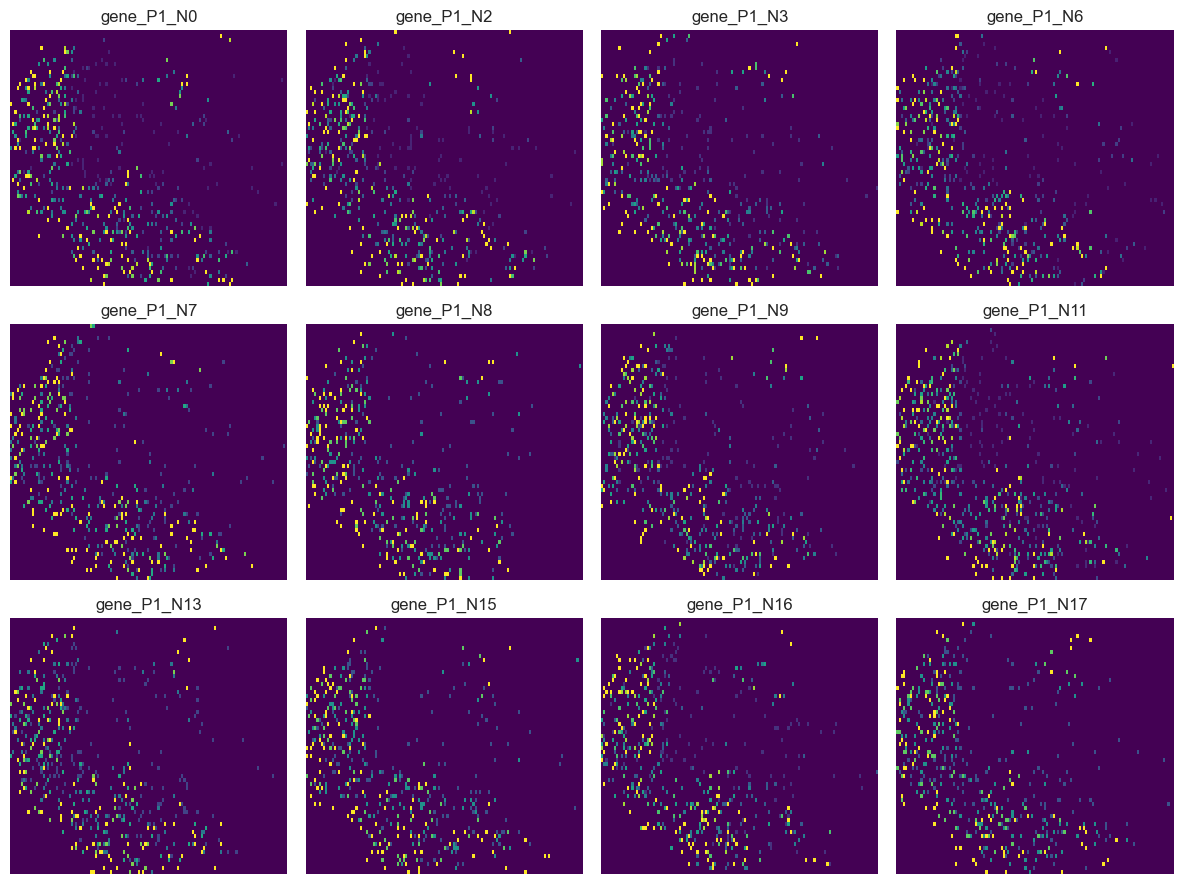

In [22]:
sp.plot.plot_genes(label=1, vmax=99)

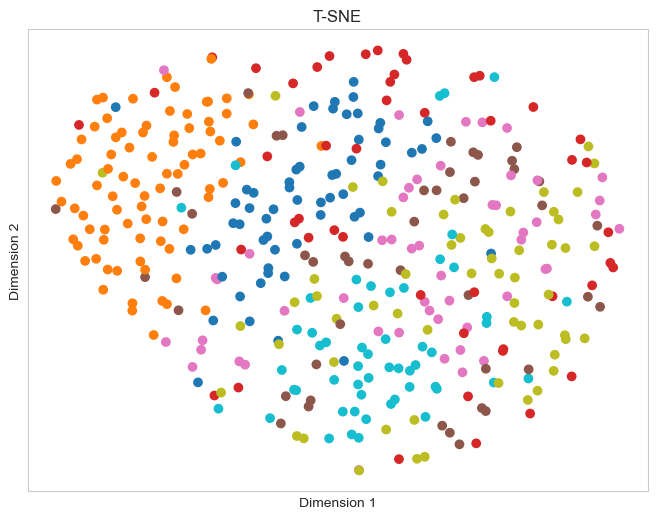

In [21]:
sp.plot.plot_tsne()

In [ ]:
sp.genes_labels

In [ ]:
sp2 = SPFinder(adata=a)
sp2.plot.plot_gene('gene_6_7')
import seaborn as sns
sns.heatmap(get_exp_array(a, 'gene_6_7'))

In [ ]:
li = sim.generate(offset_radius=5, count=5, add_noise=False, offset_probability=0.6)

In [ ]:
from scipy.sparse import csr_matrix
import seaborn as sns
import numpy as np


arr = li[4]
arr = np.maximum(arr - np.mean(arr[arr != 0]), 0)
sparse_matrix = csr_matrix(arr)
sns.scatterplot(x=sparse_matrix.nonzero()[1],
                y=sparse_matrix.nonzero()[0],
                c=sparse_matrix.data,
                cmap='viridis')

In [ ]:
class p3DPlotter(plotterBase):
    def __init__(self, initSource, initTyp, colorList, ltrParaFile, speIdSet=None):
        super().__init__(initSource, initTyp, colorList, ltrParaFile, speIdSet)
        self.init_3DRela()

    def init_3DRela(self):
        self._3D_maxTypNum = len(self.colorList)

    def transTypList2plotColorList(self, typList):
        plotColorList = []
        for typ in typList:
            if typ == 0:
                plotColorList.append('#cdcdcd')
            else:
                plotColorList.append(self.colorList[typ - 1])
        return plotColorList

    def getLegendElementList(self, typId2annot):
        legendElementList = []
        for typ in typId2annot:
            if typ == 0:
                continue
            legendElementList.append(Line2D([], [],
                                            marker='.',
                                            color=self.colorList[typ - 1],
                                            label=typId2annot[typ],
                                            markersize=25,
                                            markeredgewidth=0,
                                            linestyle='None'))
        return legendElementList

    def plot(self, adata, typList, typId2annot, outGif, plotText=True, plotTree=True):
        # adata is the loaded adata of LTR_Stream.
        # typList should be at range [0, _3D_maxTypNum]
        # 0 for grey color.
        self.checkTypeList(lowestId=0,
                           highestId=self._3D_maxTypNum,
                           typList=typList)
        plotColorList = self.transTypList2plotColorList(typList)
        legendElementList = self.getLegendElementList(typId2annot)
        comp1, comp2, comp3 = 0, 1, 2
        df_plot = pd.DataFrame(index=adata.obs.index,
                               data=adata.obsm['X_dr'],
                               columns=['Dim' + str(x + 1) for x in range(adata.obsm['X_dr'].shape[1])])
        epg = adata.uns['epg']
        flat_tree = adata.uns['flat_tree']
      